# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

---
## Step 0: Load The Data

In [1]:
#doing the imports
import pickle
import numpy as np
import pandas
import matplotlib.pyplot as plt
import random
import cv2
import tensorflow as tf
from tensorflow.contrib.layers import flatten
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

In [2]:
# Load pickled data
training_file ='./train.p'
validation_file='./valid.p'
testing_file = './test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [6]:

# Number of training examples
n_train = len(X_train)

# Number of validation examples
n_validation = valid['features'].shape[0]

# Number of testing examples.
n_test = len(X_test)

# the shape of an traffic sign image
image_shape = X_train[0].shape

# unique classes/labels existing in the dataset 
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Number of validation examples =", n_validation)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Number of validation examples = 4410
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

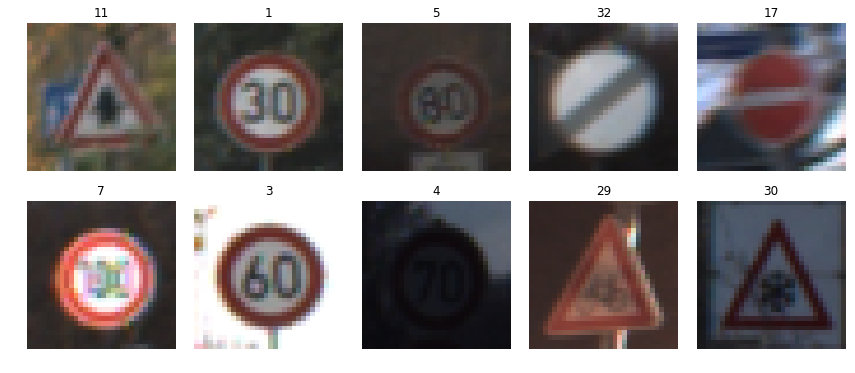

In [15]:
# Visualizations will be shown in the notebook.
fig, axs = plt.subplots(2,5, figsize=(15, 6))
fig.subplots_adjust(hspace = .2, wspace=.001)
axs = axs.ravel()
for i in range(10):
    index = random.randint(0, len(X_train)) # generate a random number within the length of the dataset 
    image = X_train[index] # call random image for plotting 
    axs[i].axis('off')
    axs[i].imshow(image)
    axs[i].set_title(y_train[index]) # put the corresponding label of the image as a title 

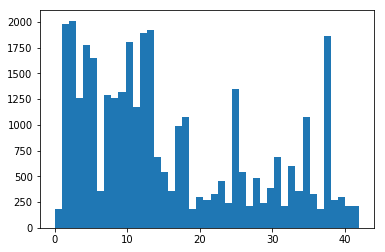

In [16]:
# counting the number of samples per unique class and plot the corresponding histogram
num_of_samples=[]
for i in range(0, n_classes):
    x_image = X_train[y_train == i]
    num_of_samples.append(len(x_image))

import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

plt.hist( [x for x in range (0,43)] , weights = num_of_samples ,bins = 43)

plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set 

In this section each preprocessing approach is written in an independent cell therefore some functions are repeated!

### APPROACH 1 : normalization only 

Here is the reference for the normalization technique https://eclass.teicrete.gr/modules/document/file.php/TP283/Lab/03.%20Lab/lesson3Notes.pdf

In [17]:
def MinMax(image) : #function to normalize the image avoiding negative values
    x=.1
    y=.9
    Xmin = np.min(image)
    Xmax = np.max(image)
    return (image-Xmin)*(y-x)/(Xmax-Xmin)

def preprocess(images):# applying normalization on a group of images
    preImages = []
    for img in images:
        preImages.append(MinMax(img))
    preImages= np.asarray(preImages, dtype='float32') #converting list output to array 
    return preImages 

X_train_normalized = preprocess(X_train) 
X_test_normalized = preprocess(X_test)
X_valid_normalized= preprocess(X_valid)

z= X_train_normalized.shape[3]


%store X_train
%store X_test
%store X_valid
%store X_train_normalized
%store X_test_normalized
%store X_valid_normalized
%store y_train
%store y_test
%store y_valid 



Stored 'X_train' (ndarray)
Stored 'X_test' (ndarray)
Stored 'X_valid' (ndarray)
Stored 'X_train_normalized' (ndarray)
Stored 'X_test_normalized' (ndarray)
Stored 'X_valid_normalized' (ndarray)
Stored 'y_train' (ndarray)
Stored 'y_test' (ndarray)
Stored 'y_valid' (ndarray)


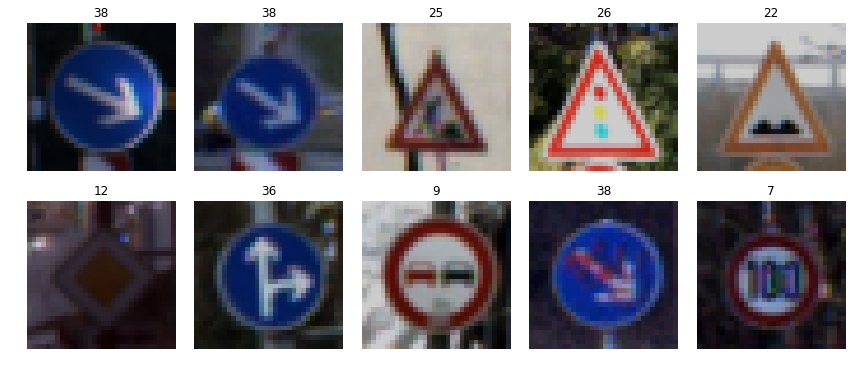

In [18]:
# visualizing normalized images 
fig, axs = plt.subplots(2,5, figsize=(15, 6))
fig.subplots_adjust(hspace = .2, wspace=.001)
axs = axs.ravel()
for i in range(10):
    index = random.randint(0, len(X_train_normalized)) # generate a random number within the length of the dataset 
    image = X_train_normalized[index] # call random image for plotting 
    axs[i].axis('off')
    axs[i].imshow(image)
    axs[i].set_title(y_train[index]) # put the corresponding label of the image as a title 

### APPROACH 2: gray scaling + normalization 

In [19]:

def MinMax(image) : #function to normalize the image avoiding negative values
    x=.1
    y=.9
    Xmin = np.min(image)
    Xmax = np.max(image)
    return (image-Xmin)*(y-x)/(Xmax-Xmin)

def preprocess(images):# applying normalization on a group of images
    preImages = []
    for img in images:
        img= cv2.cvtColor(img, cv2.COLOR_RGB2GRAY) # converting to grayscale first
        img=img[:,:,np.newaxis]
        preImages.append(MinMax(img))
    preImages= np.asarray(preImages) #converting list output to array

    return preImages 

X_train_gray_normalized = preprocess(X_train) 
X_test_gray_normalized = preprocess(X_test)
X_valid_gray_normalized= preprocess(X_valid)

%store X_train_gray_normalized
%store X_test_gray_normalized
%store X_valid_gray_normalized

Stored 'X_train_gray_normalized' (ndarray)
Stored 'X_test_gray_normalized' (ndarray)
Stored 'X_valid_gray_normalized' (ndarray)


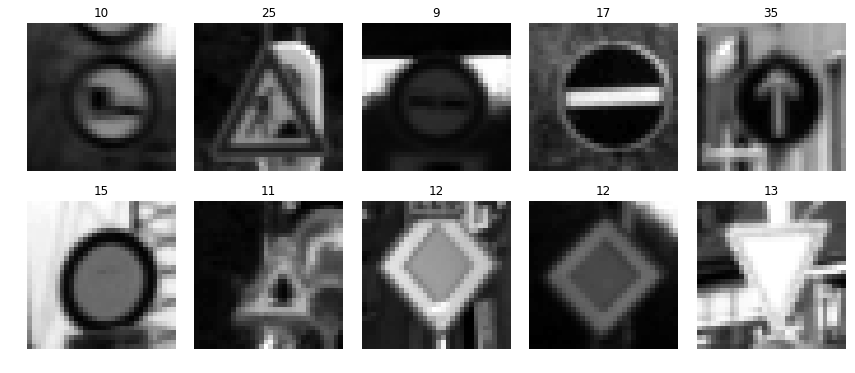

In [23]:
# vizualizing grayscale+ normalization
fig, axs = plt.subplots(2,5, figsize=(15, 6))
fig.subplots_adjust(hspace = .2, wspace=.001)
axs = axs.ravel()
for i in range(10):
    index = random.randint(0, len(X_train_gray_normalized)) # generate a random number within the length of the dataset 
    image = X_train_gray_normalized[index] # call random image for plotting 
    axs[i].axis('off')
    axs[i].imshow(image[:,:,0], cmap='gray')
    axs[i].set_title(y_train[index]) # put the corresponding label of the image as a title

### Model Architecture

In [28]:
def LeNet(x,i):  
    
    global layer1
    global layer2
    global layer3
    global layer4
    global layer5
    
    # Hyperparameters for weights generation
    mu = 0
    sigma = 0.1
    
    #  Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    W1 = tf.Variable(tf.truncated_normal(shape=(5, 5, i, 6), mean = mu, stddev = sigma))
    x = tf.nn.conv2d(x, W1, strides=[1, 1, 1, 1], padding='VALID')
    b1 = tf.Variable(tf.zeros(6))
    x = tf.nn.bias_add(x, b1)
   

    #  Activation.
    x = tf.nn.relu(x)
    
    #  Pooling. Input = 28x28x6. Output = 14x14x6.
    x = tf.nn.max_pool(x, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    layer1 = x
    
    #  Layer 2: Convolutional. Output = 10x10x16.
    W2 = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    x = tf.nn.conv2d(x, W2, strides=[1, 1, 1, 1], padding='VALID')
    b2 = tf.Variable(tf.zeros(16))
    x = tf.nn.bias_add(x, b2)
                     
    #  Activation.
    x = tf.nn.relu(x)

    #  Pooling. Input = 10x10x16. Output = 5x5x16.
    x = tf.nn.max_pool(x, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    layer2= x
   
    # Flatten. Input = 5x5x16. Output = 400.
    x = flatten(x)
    
    #  Layer 3: Fully Connected. Input = 400. Output = 120.
    W3 = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    b3 = tf.Variable(tf.zeros(120))    
    x = tf.add(tf.matmul(x, W3), b3)
    
    #  Activation.
    x = tf.nn.relu(x)
    layer3= x
    # Dropout
    x = tf.nn.dropout(x, keep_prob)

    #  Layer 4: Fully Connected. Input = 120. Output = 84.
    W4 = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    b4 = tf.Variable(tf.zeros(84)) 
    x = tf.add(tf.matmul(x, W4), b4)
    
    #  Activation.
    x = tf.nn.relu(x)
    layer4= x
    # Dropout
    x = tf.nn.dropout(x, keep_prob)

    #  Layer 5: Fully Connected. Input = 84. Output = 43.
    W5 = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    b5 = tf.Variable(tf.zeros(43)) 
    logits = tf.add(tf.matmul(x, W5), b5)
    layer5= logits
    return logits




### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

Training...

EPOCH 1 ...
Training Accuracy = 0.681
Validation Accuracy = 0.647

EPOCH 2 ...
Training Accuracy = 0.875
Validation Accuracy = 0.816

EPOCH 3 ...
Training Accuracy = 0.920
Validation Accuracy = 0.873

EPOCH 4 ...
Training Accuracy = 0.945
Validation Accuracy = 0.900

EPOCH 5 ...
Training Accuracy = 0.955
Validation Accuracy = 0.904

EPOCH 6 ...
Training Accuracy = 0.969
Validation Accuracy = 0.918

EPOCH 7 ...
Training Accuracy = 0.974
Validation Accuracy = 0.926

EPOCH 8 ...
Training Accuracy = 0.977
Validation Accuracy = 0.934

EPOCH 9 ...
Training Accuracy = 0.980
Validation Accuracy = 0.937

EPOCH 10 ...
Training Accuracy = 0.983
Validation Accuracy = 0.940

EPOCH 11 ...
Training Accuracy = 0.984
Validation Accuracy = 0.941

EPOCH 12 ...
Training Accuracy = 0.986
Validation Accuracy = 0.937

EPOCH 13 ...
Training Accuracy = 0.985
Validation Accuracy = 0.943

EPOCH 14 ...
Training Accuracy = 0.989
Validation Accuracy = 0.946

EPOCH 15 ...
Training Accuracy = 0.990
Valid

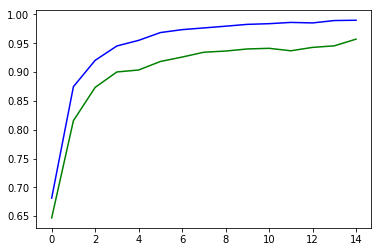

In [29]:
EPOCHS = 15
BATCH_SIZE = 100

rate = 0.001
i=1
tf.reset_default_graph()
x = tf.placeholder(tf.float32, (None, 32, 32, i))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)
keep_prob = tf.placeholder(tf.float32)
logits = LeNet(x,i)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate) # choosing ADAM optimizer
training_operation = optimizer.minimize(loss_operation)
## Evaluation
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data): #function to calculate the accuracy of all examples
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples


validation=[]
training=[]

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        Xtrain, ytrain = shuffle(X_train_gray_normalized, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = Xtrain[offset:end], ytrain[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5})
    
    
        validation_accuracy = evaluate(X_valid_gray_normalized, y_valid)
        training_accuracy   = evaluate(X_train_gray_normalized, y_train)
        
        validation.append(validation_accuracy)
        training.append(training_accuracy)
        
        print("EPOCH {} ...".format(i+1))
        print("Training Accuracy = {:.3f}".format(training_accuracy))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './net')
    print("Model saved")
    testing_accuracy = evaluate(X_test_gray_normalized, y_test)
    print("Testing Accuracy = {:.3f}".format(testing_accuracy))

    validation= np.asarray(validation)
    np.asarray(training)
    # plot curve of accuracy over epochs
    plt.plot(np.array(range(EPOCHS)), training, color='blue')
    plt.plot(np.array(range(EPOCHS)), validation, color='green')


## Step 3: Test a Model on New Images

* ### Load and Output the Images
* ### Predict the sign type of each image
* ### Analyze performance 

(6, 32, 32, 1)
[25, 37, 18, 11, 5, 38]
[25 37 18 11  5 38]
100.0 %


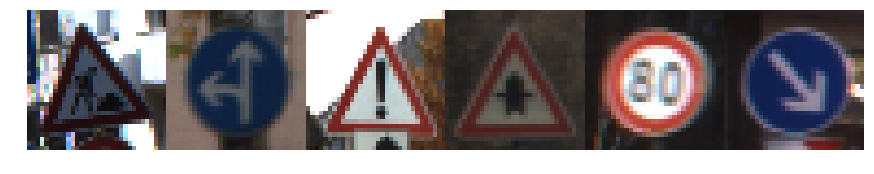

In [30]:
#load new images 
my_images = []
fig, axs = plt.subplots(1, 6, figsize=(15, 15))
fig.subplots_adjust(hspace = .2, wspace=.001)
axs = axs.ravel()
import glob
for i, img in enumerate(glob.glob('./selected_img/*.ppm')):
    image = cv2.imread(img)
    image= cv2.resize(image, (32,32))
    axs[i].axis('off')
    axs[i].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    image= cv2.cvtColor(image, cv2.COLOR_RGB2GRAY) # converting to grayscale first
    image=image[:,:,np.newaxis]
    image = MinMax(image) #normalizing 
    my_images.append(image)

my_images = np.asarray(my_images, dtype='float')

print(my_images.shape)

my_labels =[25,37,18,11,5,38]
print(my_labels)
my_labels= np.asarray(my_labels, dtype='float')
   
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)


prediction = tf.nn.softmax(logits)
with tf.Session() as sess3:
    sess3.run(tf.global_variables_initializer())
    saver3 = tf.train.import_meta_graph('./net.meta')
    saver3.restore(sess3, "./net")
    
    preds = sess3.run(prediction, feed_dict={x: my_images, keep_prob: 1.0})
    result = sess3.run(tf.argmax(preds, 1))
    a=0
    for i in range(6):
        if result[i]==my_labels[i]:
             a+=1
                
    accuracy= (a/6)*100        
    
    print(result) 
    print(accuracy,'%')

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [31]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
def top_k(predicitions, k):
    soft_max = tf.nn.softmax(tf.constant(predicitions))
    with tf.Session() as sess:
        tpk = sess.run(tf.nn.top_k(soft_max,k=k))
    return tpk

print(top_k(preds,5))

TopKV2(values=array([[ 0.05978591,  0.0227606 ,  0.02238076,  0.02237795,  0.02237708],
       [ 0.06046296,  0.02243375,  0.02241438,  0.02237213,  0.02237181],
       [ 0.06078676,  0.02236223,  0.02236222,  0.02236222,  0.02236222],
       [ 0.06078423,  0.02236324,  0.02236226,  0.02236226,  0.02236226],
       [ 0.04011158,  0.03405076,  0.02286245,  0.02259345,  0.02258292],
       [ 0.06078682,  0.02236222,  0.02236222,  0.02236222,  0.02236222]], dtype=float32), indices=array([[25, 29, 24, 22, 30],
       [37, 39, 40, 18, 26],
       [18, 26, 27,  0,  1],
       [11, 30, 27,  0,  1],
       [ 5,  2,  3,  4,  1],
       [38,  0,  1,  2,  3]], dtype=int32))



## Step 4 (Optional): Visualize the Neural Network's State with Test Images 


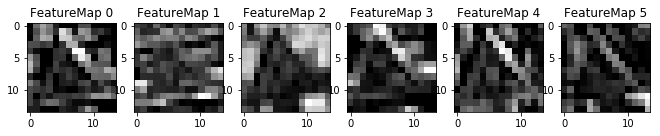

In [33]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess4,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")
            
with tf.Session() as sess4:
    sess4.run(tf.global_variables_initializer())
    saver4 = tf.train.import_meta_graph('./net.meta')
    saver4.restore(sess4, "./net")            
    outputFeatureMap(my_images, layer1, activation_min=-1, activation_max=-1 ,plt_num=1)            